# Data Exploration

### Imports

In [52]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import numpy as np

### Class Distribution

Abnormal Sperm: 1005 images 
Non Sperm: 974 images 
Normal Sperm: 1021 images


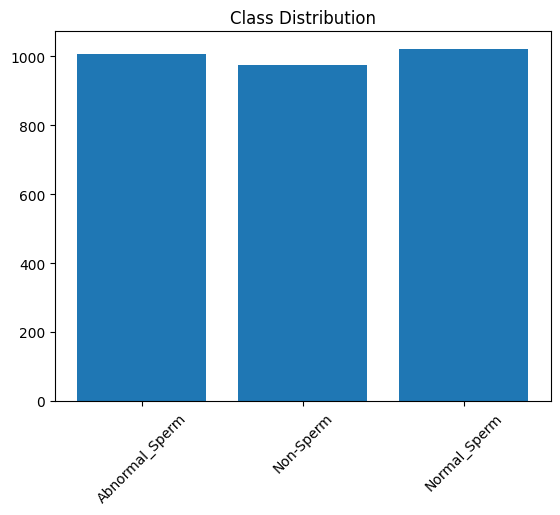

In [ ]:
dataset_path = r"data"
classes = os.listdir(dataset_path)
counts = [len(os.listdir(os.path.join(dataset_path, c))) for c in classes]
print (f"Abnormal Sperm: {counts[0]} images \nNon Sperm: {counts[1]} images \nNormal Sperm: {counts[2]} images")
plt.bar(classes, counts)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()



### Resizing Images

Before Resize: (170, 205, 3)
After Resize: (224, 224, 3)


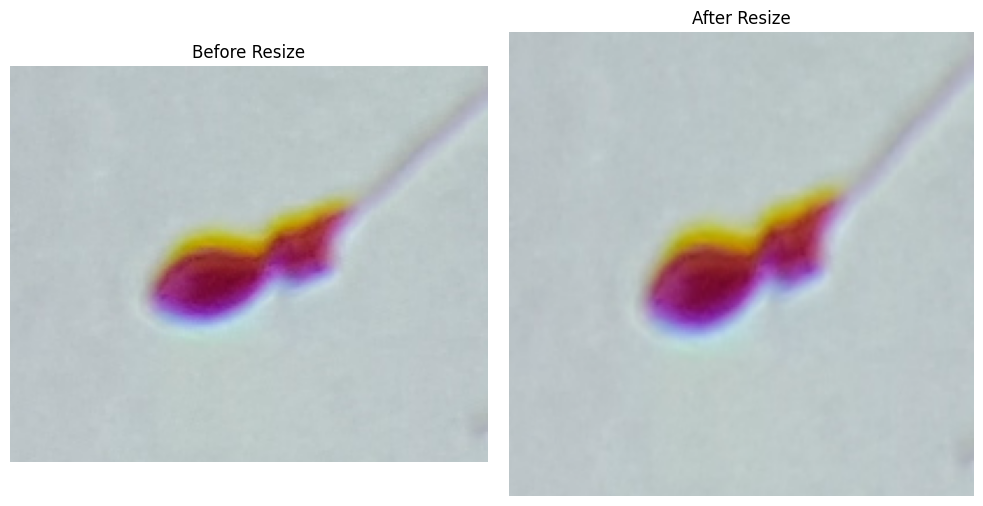

In [53]:
image_paths = []
labels = []
for classes in os.listdir(dataset_path):
    for img_file in os.listdir(f"data/{classes}/"):
        image_paths.append(f"data/{classes}/{img_file}")
        labels.append(classes)

df = pd.DataFrame({"image_path": image_paths, "label": labels})

# Load the images
def load(path):
    img= cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
    
# Resize the images
def resize(img, img_size=(224,224)):
    img = cv2.resize(img, img_size)
    return img

df["raw_image"] = df["image_path"].apply(load)
df["resized_image"] = df["raw_image"].apply(resize)


# Print shapes
print("Before Resize:", df["raw_image"][2].shape)
print("After Resize:", df["resized_image"][2].shape)

# Converts BGR (OpenCV) to RGB (Matplotlib)
def cv2_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plott the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2_to_rgb(df["raw_image"][2]))
plt.title("Before Resize")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2_to_rgb(df["resized_image"][2]))
plt.title("After Resize")
plt.axis('off')

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 2, not 3

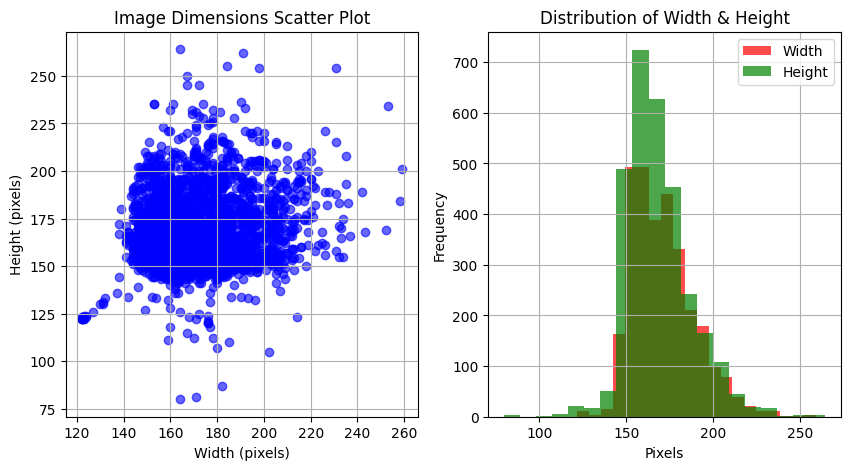

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df["raw_image"] contains image arrays (e.g., loaded with OpenCV/PIL)
# Extract dimensions (height, width, channels) for each image
df["dimensions"] = df["raw_image"].apply(lambda img: img.shape)  # Returns (height, width, channels)
df[["height", "width", "channels"]] = pd.DataFrame(df["dimensions"].tolist(), index=df.index)

# Plot 1: Scatter Plot (Width vs. Height)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df["width"], df["height"], alpha=0.6, color='blue')
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Image Dimensions Scatter Plot")
plt.grid(True)

# Plot 2: Histograms (Width & Height Distributions)
plt.subplot(1, 2, 2)
plt.hist(df["width"], bins=20, alpha=0.7, color='red', label="Width")
plt.hist(df["height"], bins=20, alpha=0.7, color='green', label="Height")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Distribution of Width & Height")
plt.legend()
plt.grid(True)

# plt.subplot(1, 2, 3)
# plt.hist(df["width"], bins=20, alpha=0.7, color='red', label="Width")
# plt.hist(df["height"], bins=20, alpha=0.7, color='green', label="Height")
# plt.xlabel("Pixels")
# plt.ylabel("Frequency")
# plt.title("Distribution of Width & Height")
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()